## Number of fill values of E-layer height per day 2012-01-01 to 2012-12-31

### Open file and put data into lists

In [1]:
## Import stuff
import datetime

# Define timestamp array
timestamp = []
# Define hE height of E layer array
hE = []
# Define CS array
CS = []

# Define filename
filename = "hE Gakona 2012-01-01 to 2012-12-31.txt"
# Open file - read
fp = open(filename, 'r')
# Read every line in file
for line in fp:
# Skip comments
    if line[0] == "#":
        continue
# Strip lines
    else:
        line_strip = line.strip()
# Split lines into lists
        line_split = line.split()
# Append hE data into array
        hE.append(float(line_split[2]))
# Append CS values to array
        CS.append(int(line_split[1]))
# Use datetime to read timestamps
        this_ts = datetime.datetime.strptime(line_split[0], "%Y-%m-%dT%H:%M:%S.%fZ")
# Append timestamp data into array        
        timestamp.append(this_ts)
print("Number of hE height data lines:", len(hE))
print("Number of timestamp data lines:", len(timestamp))
print("Number of CS data lines:", len(CS))
#print(CS[4])
print("Lowest height found:", min(hE))
print("Type of data of hE:", type(hE[1]))
# Close file
fp.close()

Number of hE height data lines: 24853
Number of timestamp data lines: 24853
Number of CS data lines: 24853
Lowest height found: 77.6
Type of data of hE: <class 'float'>


### Find height of E layer for CS values below 20

In [63]:
# Create new list for CS values below 20
CS_20 = []
# Create new list to store height for CS values below 20
hE_20 = []
# Create new list to store timestamps for reported hE values of CS values below 20
timestamp_20 = []

# Create variables to save index for every CS value <= 20

# For hE_20
j = 0
# For timestamp_20
m = 0

def height_20(CS):
    # for each index in array CS
    for index, i in enumerate(CS):
        # if value in that specific index is less than or equal to 20
        if (i) <= 20:
            # append to CS_20
            CS_20.append(i)
            # append the value in this index in hE to hE_20
            j = hE[index]
            hE_20.append(j)
            # append the value in this index in timestamp to timestamp_20
            m = timestamp[index]
            timestamp_20.append(m)

# Call function on CS
height_20(CS)

# Print lengths of each list
print("Length of list CS_20: ", len(CS_20))
print("Length of list hE_20: ", len(hE_20))
print("Length of list timestamp_20: ", len(timestamp_20))


Length of list CS_20:  1304
Length of list hE_20:  1304
Length of list timestamp_20:  1304


### Graph fill values hE_20 vs time timestamp_20 for 1 year

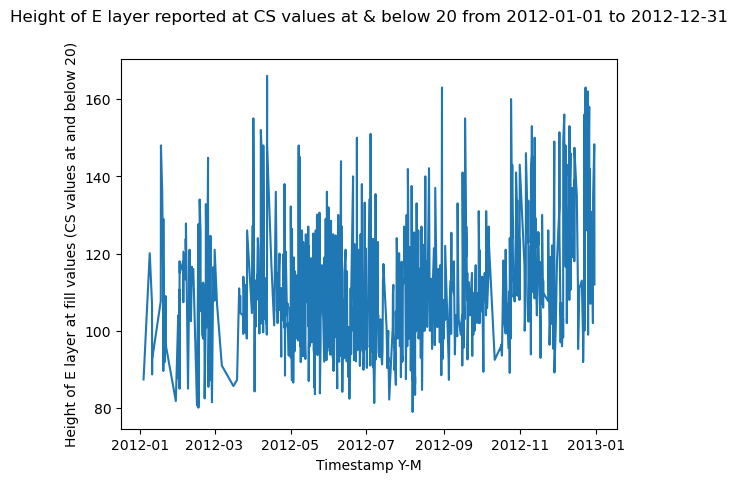

In [64]:
#Import stuff
import matplotlib.pyplot as plt
import numpy as np

# Plot
plt.plot(timestamp_20, hE_20)

# Axes
plt.ylabel("Height of E layer at fill values (CS values at and below 20)", fontsize = 10)
plt.xlabel("Timestamp Y-M", fontsize = 10)

# Title
# y = 1.08 to prevent overlap of y axis and title
plt.title("Height of E layer reported at CS values at & below 20 from 2012-01-01 to 2012-12-31", y = 1.08)

plt.show()

### Save timestamp_20, CS_20 and hE_20 to txt file

In [65]:
import numpy as np

timestamp_20array = np.array(timestamp_20)
CS_20array = np.array(CS_20)
hE_20array = np.array(hE_20)

file = open("Fill values.txt", "w")             

data = np.column_stack([timestamp_20array, CS_20array, hE_20array])

np.savetxt("Fill values.txt", data, fmt=["% 20s", "% 4d", "% 5.1f"])

file.close()

### Graph fill values vs timestamp for 24H

In [66]:
# later used to append to hE_day
j = 0

# Create new lists
timestamp_day = []
hE_day = []

# Get timestamp_20 data for 1 day
for index, i in enumerate(timestamp_20):
    if i.day == 19:
        if i.month == 1:
            print(i)
            # append to new list
            timestamp_day.append(i)

            # append corresponding hE values
            j = hE_20[index]
            hE_day.append(j)
        
print(timestamp_day, hE_day)

2012-01-19 00:00:00
2012-01-19 20:15:00
2012-01-19 20:37:30
2012-01-19 21:30:00
2012-01-19 21:45:00
2012-01-19 21:52:30
2012-01-19 22:07:30
[datetime.datetime(2012, 1, 19, 0, 0), datetime.datetime(2012, 1, 19, 20, 15), datetime.datetime(2012, 1, 19, 20, 37, 30), datetime.datetime(2012, 1, 19, 21, 30), datetime.datetime(2012, 1, 19, 21, 45), datetime.datetime(2012, 1, 19, 21, 52, 30), datetime.datetime(2012, 1, 19, 22, 7, 30)] [136.0, 111.0, 110.0, 89.6, 103.0, 100.0, 129.0]


### Graph time vs number of fill values for 2012-01-19

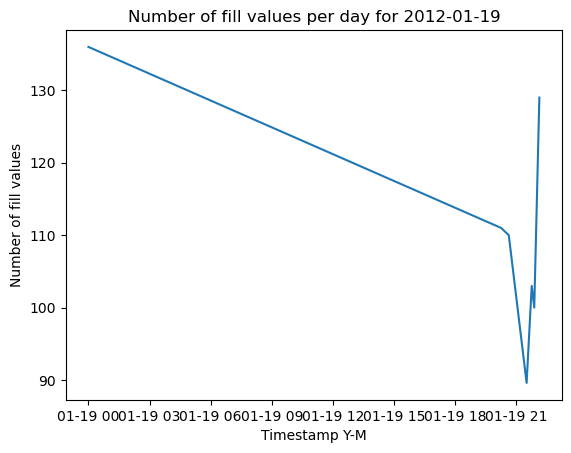

In [67]:
#Import stuff
import matplotlib.pyplot as plt
import numpy as np

# Plot
plt.plot(timestamp_day, hE_day)

# Axes
plt.ylabel("Number of fill values", fontsize = 10)
plt.xlabel("Timestamp Y-M", fontsize = 10)

# Title
# y = 1.08 to prevent overlap of y axis and title
plt.title("Number of fill values per day for 2012-01-19")

plt.show()

### Number of fill values per day for 2012

### Plan:

##### 1. For CS_20, loop through every:
##### month (i=1, i<13, i++) - 
##### loop through every day (if Jan1, Mar3, May5, Jul7, Aug8, Oct10, Dec12 - 31, if Apr4, Jun6, Sep9, Nov11 - 30, if Feb - 29 for leap year 2012)
##### 2. Make sure to skip any days/months NOT reported in CS_20
##### 3. within the loop, count the number of vals each day has and store in array
##### 4. Plot should have 366 points
##### 5. Also can find average/median/mode of the list

In [149]:
# Array to store len(list)
fill_per_day = []

# Define tracker?
#counter = 0

from collections import Counter
from collections import OrderedDict


# now get counter for each month??
# make array list for 12 months using timestamp_20
month_array = []
day_array = []

jan_array = []
janday_array = []
feb_array = []
mar_array = []
apr_array = []
may_array = []
jun_array = []
jul_array = []
aug_array = []
sep_array = []
oct_array = []
nov_array = []
dec_array = []

for index, i in enumerate(timestamp_20):
    for month in range(1, 13, 1):
        if i.month == month:
            month_array.append(month)

            if i.month == 1:
                # all days in Jan appearing in timestamp_20
                jan_array.append(i.day)
            if i.month == 2:
                feb_array.append(i.day)
            if i.month == 3:
                mar_array.append(i.day)
            if i.month == 4:
                apr_array.append(i.day)
            if i.month == 5:
                may_array.append(i.day)
            if i.month == 6:
                jun_array.append(i.day)
            if i.month == 7:
                jul_array.append(i.day)
            if i.month == 8:
                aug_array.append(i.day)
            if i.month == 9:
                sep_array.append(i.day)
            if i.month == 10:
                oct_array.append(i.day)
            if i.month == 11:
                nov_array.append(i.day)
            if i.month == 12:
                dec_array.append(i.day)
                
             
# new list
months_in_timestamp_20 = []

# get number of times month is recurring in timestamp_20
# sort 
for i in sorted(Counter(month_array)):
    months_in_timestamp_20.append(((i, (Counter(month_array)[i]))))


#### January specific!

In [151]:
# append days in timestamp_20 for Jan
janday_array = []

# sort janday_array by numerical day (key)
# 0th index of janday_array is day and 1st index is number of recurrences
for i in sorted(Counter(jan_array)):
    janday_array.append(((i, (Counter(jan_array)[i]))))

# new lists to use for plot
# number of recurrences per day Jan
jan_spec_rec = []
# the days of Jan
jan_spec_day = []

for i in janday_array:
    jan_spec_rec.append(i[1])
    jan_spec_day.append(i[0])

print("janspecday and janspecrec: ", jan_spec_day, jan_spec_rec)
print("\n")
print("jan_array: ", jan_array)
print("\n")
print("janday_array (sorted by month - 0th index)", janday_array)
print("\n")
print("days of Jan in timestamp_20 + recurrences: ")

# key = day of month, value = number of times repeated

janspecday and janspecrec:  [4, 8, 10, 17, 19, 20, 21, 22, 29, 31] [1, 1, 3, 2, 7, 4, 5, 1, 1, 1]


jan_array:  [4, 8, 10, 10, 10, 17, 17, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 29, 31]


janday_array (sorted by month - 0th index) [(4, 1), (8, 1), (10, 3), (17, 2), (19, 7), (20, 4), (21, 5), (22, 1), (29, 1), (31, 1)]


days of Jan in timestamp_20 + recurrences: 


### Graph number of fill values per day for Jan 2012

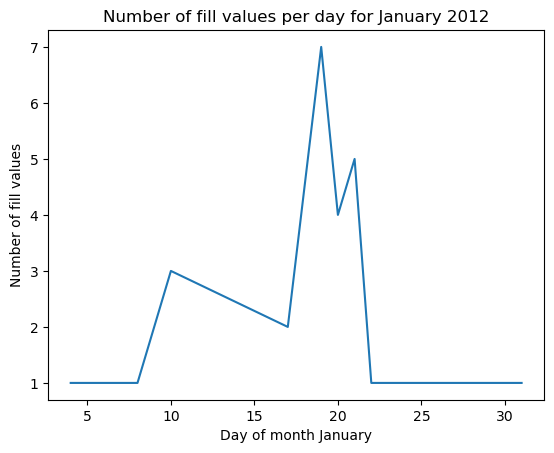

In [146]:
# Plot
plt.plot(jan_spec_day, jan_spec_rec)

# Axes
plt.ylabel("Number of fill values", fontsize = 10)
plt.xlabel("Day of month January", fontsize = 10)

# Title
# y = 1.08 to prevent overlap of y axis and title
plt.title("Number of fill values per day for January 2012")

plt.show()

### February specific!

In [152]:
# append days in timestamp_20 for Jan
febday_array = []

# sort janday_array by numerical day (key)
# 0th index of janday_array is day and 1st index is number of recurrences
for i in sorted(Counter(feb_array)):
    febday_array.append(((i, (Counter(feb_array)[i]))))

# new lists to use for plot
# number of recurrences per day Jan
feb_spec_rec = []
# the days of Jan
feb_spec_day = []

for i in febday_array:
    feb_spec_rec.append(i[1])
    feb_spec_day.append(i[0])

print("febspecday and febspecrec: ", feb_spec_day, feb_spec_rec)
print("\n")
print("feb_array: ", feb_array)
print("\n")
print("febday_array (sorted version of feb_array): ", febday_array)
print("\n")
print("days of Feb in timestamp_20 + recurrences: ")


# key = day of month, value = number of times repeated

febspecday and febspecrec:  [1, 4, 5, 6, 7, 8, 9, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] [8, 2, 1, 6, 2, 1, 2, 3, 1, 2, 1, 8, 3, 4, 3, 1, 2, 7, 5, 7, 12, 2, 1, 4]


feb_array:  [1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 5, 6, 6, 6, 6, 6, 6, 7, 7, 8, 9, 9, 11, 11, 11, 12, 15, 15, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 21, 22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 28, 29, 29, 29, 29]


febday_array (sorted version of feb_array):  [(1, 8), (4, 2), (5, 1), (6, 6), (7, 2), (8, 1), (9, 2), (11, 3), (12, 1), (15, 2), (16, 1), (17, 8), (18, 3), (19, 4), (20, 3), (21, 1), (22, 2), (23, 7), (24, 5), (25, 7), (26, 12), (27, 2), (28, 1), (29, 4)]


days of Feb in timestamp_20 + recurrences: 


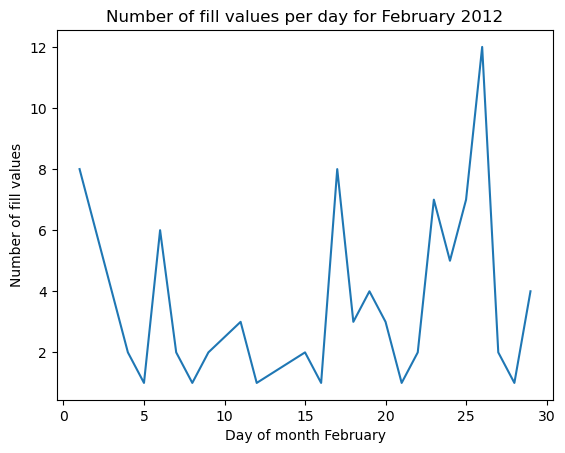

In [153]:
# Plot
plt.plot(feb_spec_day, feb_spec_rec)

# Axes
plt.ylabel("Number of fill values", fontsize = 10)
plt.xlabel("Day of month February", fontsize = 10)

# Title
# y = 1.08 to prevent overlap of y axis and title
plt.title("Number of fill values per day for February 2012")

plt.show()